In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
folders=os.listdir('/content/drive/MyDrive/brain tumor/')

In [4]:
print(folders)

['train', 'test']


In [5]:
for f in folders:
  path = '/content/drive/MyDrive/brain tumor/' + f

  print(f+" " + str(len(os.listdir(path))))

train 2
test 2


In [6]:
import keras.utils as image
import matplotlib.pyplot as plt

In [7]:
sample_image = '/content/drive/MyDrive/brain tumor/train/no/10 no.jpg'
img = image.load_img(sample_image)

In [8]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=173x201 at 0x7F2DD4F832E0>


## using data augmentation to create more images of 'no' class to balance the imbalanced dataset


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
       shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
        fill_mode='nearest')

img =image.load_img('/content/drive/MyDrive/brain tumor/no/11 no.jpg')  # this is a PIL image
x =image.img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

 #the .flow() command below generates batches of randomly transformed images
 #and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/brain tumor/no/', save_prefix='no', save_format='jpeg'):
    i += 1
    if i > 30:
        break  # otherwise the generator would loop indefinitely

In [10]:
for f in folders:
  path = '/content/drive/MyDrive/brain tumor/' + f

  print(f+" " + str(len(os.listdir(path))))

train 2
test 2


In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img =image.load_img('/content/drive/MyDrive/brain tumor/no/11 no.jpg')  # this is a PIL image
x =image.img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                        save_to_dir='/content/drive/MyDrive/brain tumor/no/', save_prefix='no', save_format='jpeg'):
    i += 1
    if i > 30:
        break  # otherwise the generator would loop indefinitely

In [12]:
for f in folders:
  path = '/content/drive/MyDrive/brain tumor/' + f

  print(f+" " + str(len(os.listdir(path))))

train 2
test 2


## manually created test and train folders

In [13]:
train_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_gen.flow_from_directory('/content/drive/MyDrive/brain tumor/train/',
                                                target_size = (224,224),#
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 294 images belonging to 2 classes.


In [15]:
for x, y in train_generator:
  x, y = train_generator.next()
  print(x.shape, y.shape)
  break

(32, 224, 224, 3) (32,)


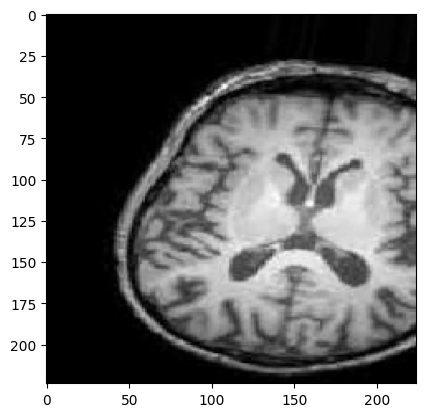

0.0


In [16]:
plt.imshow(x[1])
plt.show()
print(y[1])

In [17]:
test_gen = ImageDataGenerator(rescale = 1.0/255)

test_generator = test_gen.flow_from_directory('/content/drive/MyDrive/brain tumor/test/',
                                                target_size = (224,224),#
                                                batch_size = 11,
                                                class_mode = 'binary')

Found 11 images belonging to 2 classes.


In [18]:
for x, y in test_generator:
  x, y = test_generator.next()
  print(x.shape, y.shape)
  break

(11, 224, 224, 3) (11,)


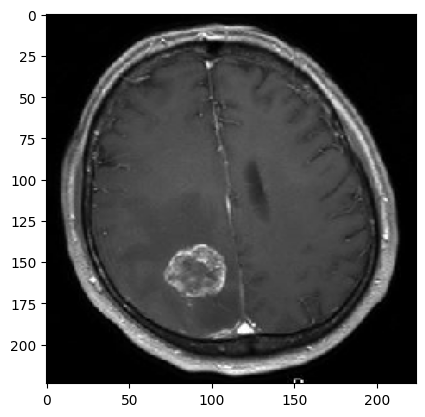

1.0


In [19]:
plt.imshow(x[1])
plt.show()
print(y[1])

In [23]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Flatten, Dropout,Conv2D
from tensorflow.keras.models import Model
import numpy as np

## using resnet50 as base model for fine tuning

In [21]:

base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))#??
base_model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [22]:
for layer in base_model.layers:
  layer.trainable = False

In [25]:
x = base_model.output

x=Conv2D(32, kernel_size=(3,3), activation = "relu")(x)
x=Conv2D(64, kernel_size=(3,3), activation = "relu")(x)
x=Conv2D(128, kernel_size=(3,3), activation = "relu")(x)
x=Dropout(0.2)(x)
x=Dense(128, activation='relu')(x)
x=Flatten()(x)

x = Dense(1, activation = 'sigmoid')(x)

In [26]:
model = Model(inputs = base_model.input, outputs = x)

In [27]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics=["accuracy"])

In [28]:
history = model.fit_generator(
    train_generator,
    epochs = 30,
    steps_per_epoch = 7,
  )

<ipython-input-28-578a7ee3f94d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
7/7 [==============================] - 64s 8s/step - loss: 0.6949 - accuracy: 0.5759
Epoch 2/30
7/7 [==============================] - 42s 6s/step - loss: 0.6193 - accuracy: 0.6161
Epoch 3/30
7/7 [==============================] - 42s 6s/step - loss: 0.6187 - accuracy: 0.7054
Epoch 4/30
7/7 [==============================] - 36s 5s/step - loss: 0.5492 - accuracy: 0.7424
Epoch 5/30
7/7 [==============================] - 41s 6s/step - loss: 0.5130 - accuracy: 0.7455
Epoch 6/30
7/7 [==============================] - 41s 6s/step - loss: 0.4899 - accuracy: 0.7589
Epoch 7/30
7/7 [==============================] - 37s 5s/step - loss: 0.4226 - accuracy: 0.8030
Epoch 8/30
7/7 [==============================] - 38s 5s/step - loss: 0.4643 - accuracy: 0.7727
Epoch 9/30
7/7 [==============================] - 37s 6s/step - loss: 0.4739 - accuracy: 0.7879
Epoch 10/30
7/7 [==============================] - 41s 6s/step - loss: 0.4169 - accuracy: 0.8214
Epoch 11/30
7/7 [======================

In [29]:
model.predict(test_generator)

1/1 [==============================] - 3s 3s/step


array([[0.03300845],
       [0.9283217 ],
       [0.03302156],
       [0.79397285],
       [0.00411708],
       [0.85879165],
       [0.7622052 ],
       [0.60756564],
       [0.02764366],
       [0.11865619],
       [0.1820668 ]], dtype=float32)

In [30]:
loss, acc = model.evaluate_generator(test_generator)

<ipython-input-30-10a36bc13832>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_generator)


In [31]:
loss

0.3326317071914673

In [32]:
acc

0.9090909361839294

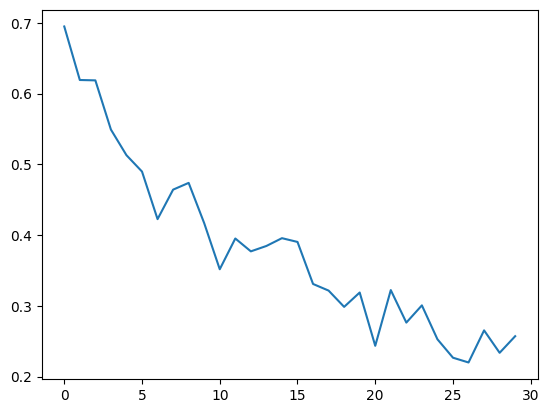

In [33]:
plt.plot(history.history["loss"])

In [36]:
model.save('/content/drive/MyDrive/tumor.h5')